# <font color='blue'>Topic Modeling 
</font> <font color='red'>NLP project, LDA & Naive byse</font> 
* **Part 1 - Data Preprocessing**
   1. Importing the dataset
   2. Dataset information
   3. Importing relevant libraries
   4. Clean the data and lemmatize it
   5. Droping stop words
 
 
* **Part 2 - LDA with Gensim library**
   1. Text lemmataizing with Spacy
   2. Creating the model & find most significant words in every topic
   3. Creating words-cloud
   
   
* **Part 3 - Naive bayes**  
   1. Prepering the text & target columns for classification
   2. CountVectorizer
       - 2.1. Creating BoW by CountVectorizer       
       - 2.2 Creating document-term matrix
       - 2.3 Fitting, predictions & model accurecy
   3. TF-IDF
       - 3.1 Creating TfidfVectorizer
       - 3.2 Fitting, predictions & model accurecy 
   4. Confusion matrix    
   
   
* **Part 4 - LDA with SKlearn**   
   1. LDA with countvectorizer BOW
   2. LDA with TF-IDF vectorizer

## Part 1 - Data Preprocessing

### 1.1 Importing the dataset

In [581]:
from sklearn.datasets import fetch_20newsgroups
cats = ['alt.atheism', 'sci.med', 'soc.religion.christian', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True, remove=('headers', 'footers', 'quotes'), categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True, remove=('headers', 'footers', 'quotes'), categories=cats)

In [582]:
import pandas as pd

train_df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
train_df.columns = ['text', 'target']

test_df = pd.DataFrame([newsgroups_test.data, newsgroups_test.target.tolist()]).T
test_df.columns = ['text', 'target']

### 1.2 Dataset information

In [583]:
train_df.head()

,text,target
0,Does anyone know of a good way (standard PC ap...,1
1,"Hi,\n\n\tI have a problem, I hope some of the ...",1
2,"(Well, I'll email also, but this may apply to ...",3
3,"Hello,\n\nI'm writing a paper on the role of t...",3
4,,3


In [584]:
test_df.head()

,text,target
0,"As I recall from my bout with kidney stones, t...",2
1,\nI guess I'm still not clear on what the term...,2
2,\n\nAs a child i can remember picking up a cen...,2
3,\nYou mean Bobby Mozumder is a myth? We won...,0
4,The following is a juxtaposition of part of an...,3


In [585]:
targets = pd.DataFrame(newsgroups_train.target_names)
targets.columns=['title']
targets

,title
0,alt.atheism
1,comp.graphics
2,sci.med
3,soc.religion.christian


In [586]:
train_df['text'][0]

'Does anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.'

### 1.3 Importing relevant libraries

In [587]:
import re
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import LdaModel

import spacy
from spacy.lang.en.examples import sentences 
nlp = spacy.load("en_core_web_sm")

from sklearn.decomposition import LatentDirichletAllocation

### 1.4 Clean the data and lemmatize it

In [588]:
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
  
    pos_counts = Counter()

    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
  
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

In [589]:
for i in range(len(train_df['text'])):
    clean_text = re.sub('\W+|[0-9]', ' ', train_df['text'][i])
    clean_text = clean_text.lower()
    tokenized = word_tokenize(clean_text)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in tokenized]
    
    train_df['text'][i] = lemmatized

In [590]:
for i in range(len(test_df['text'])):
    clean_text = re.sub('\W+|[0-9]', ' ', test_df['text'][i])
    clean_text = clean_text.lower()
    tokenized = word_tokenize(clean_text)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(token,get_part_of_speech(token)) for token in tokenized]
    
    test_df['text'][i] = lemmatized

In [591]:
train_df['text']

0       [do, anyone, know, of, a, good, way, standard,...
1       [hi, i, have, a, problem, i, hope, some, of, t...
2       [well, i, ll, email, also, but, this, may, app...
3       [hello, i, m, write, a, paper, on, the, role, ...
4                                                      []
                              ...                        
2252    [i, be, look, for, a, rat, cell, line, of, adr...
2253    [this, will, be, the, first, of, monthly, post...
2254    [i, may, not, be, the, world, s, greatest, exp...
2255    [archive, name, type, injury, faq, general, ve...
2256    [you, forget, the, smiley, face, i, can, t, be...
Name: text, Length: 2257, dtype: object

In [592]:
test_df['text']

0       [a, i, recall, from, my, bout, with, kidney, s...
1       [i, guess, i, m, still, not, clear, on, what, ...
2       [a, a, child, i, can, remember, pick, up, a, c...
3       [you, mean, bobby, mozumder, be, a, myth, we, ...
4       [the, follow, be, a, juxtaposition, of, part, ...
                              ...                        
1497    [i, be, wonder, if, a, group, call, sci, pharm...
1498    [this, be, not, an, unusual, practice, if, the...
1499    [agent, of, the, original, poster, do, not, sa...
1500                                                   []
1501      [yes, it, look, like, very, good, indeed, nope]
Name: text, Length: 1502, dtype: object

### 1.5 Droping stop words

In [596]:
for i in range(len(train_df['text'])):
    tokens_without_sw = [word for word in train_df['text'][i] if word not in sw_nltk]
    train_df['text'][i] = tokens_without_sw

In [597]:
train_df['text']

0       [anyone, know, good, way, standard, pc, applic...
1       [hi, problem, hope, guru, help, solve, backgro...
2       [well, email, also, may, apply, people, post, ...
3       [hello, write, paper, role, catholic, church, ...
4                                                      []
                              ...                        
2252    [look, rat, cell, line, adrenal, gland, cortic...
2253    [first, monthly, post, newsletter, long, islan...
2254    [may, world, greatest, expert, chigger, type, ...
2255    [archive, name, type, injury, faq, general, ve...
2256    [forget, smiley, face, believe, turn, berkeley...
Name: text, Length: 2257, dtype: object

In [598]:
for i in range(len(test_df['text'])):
    tokens_without_sw = [word for word in test_df['text'][i] if word not in sw_nltk]
    test_df['text'][i] = tokens_without_sw

In [599]:
test_df['text']

0       [recall, bout, kidney, stone, medication, anyt...
1       [guess, still, clear, term, candida, bloom, me...
2       [child, remember, pick, centipede, get, rather...
3       [mean, bobby, mozumder, myth, wonder, mean, bo...
4       [follow, juxtaposition, part, ancient, text, k...
                              ...                        
1497    [wonder, group, call, sci, pharmacology, would...
1498    [unusual, practice, doctor, also, member, nudi...
1499    [agent, original, poster, say, mother, hospita...
1500                                                   []
1501                [yes, look, like, good, indeed, nope]
Name: text, Length: 1502, dtype: object

## Part 2 -  LDA with gensim

### 2.1 Text lemmataizing with Spacy

In [603]:
train_lemmitaized_data = train_df['text']
test_lemmitaized_data = test_df['text']

In [604]:
train_lemmitaized_data

0       [anyone, know, good, way, standard, pc, applic...
1       [hi, problem, hope, guru, help, solve, backgro...
2       [well, email, also, may, apply, people, post, ...
3       [hello, write, paper, role, catholic, church, ...
4                                                      []
                              ...                        
2252    [look, rat, cell, line, adrenal, gland, cortic...
2253    [first, monthly, post, newsletter, long, islan...
2254    [may, world, greatest, expert, chigger, type, ...
2255    [archive, name, type, injury, faq, general, ve...
2256    [forget, smiley, face, believe, turn, berkeley...
Name: text, Length: 2257, dtype: object

In [698]:
id2word = corpora.Dictionary(train_lemmitaized_data)

texts = train_lemmitaized_data

corpus = [id2word.doc2bow(text) for text in texts]

### 2.2 Creating the model & find most significant words in every topic

In [641]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word = id2word, num_topics=4, random_state=1,chunksize=200, passes=10, per_word_topics=True)

### Most significant words in every topic according to gensim lda model:

In [642]:
from IPython.core.display import HTML
display(lda_model.print_topics())

[(0,
  '0.011*"edu" + 0.007*"image" + 0.007*"file" + 0.007*"use" + 0.006*"graphic" + 0.006*"x" + 0.006*"p" + 0.005*"c" + 0.005*"program" + 0.005*"mail"'),
 (1,
  '0.015*"god" + 0.010*"say" + 0.009*"jesus" + 0.007*"one" + 0.007*"come" + 0.006*"would" + 0.005*"people" + 0.005*"time" + 0.005*"christ" + 0.005*"go"'),
 (2,
  '0.011*"one" + 0.009*"think" + 0.009*"would" + 0.007*"people" + 0.006*"say" + 0.006*"make" + 0.006*"know" + 0.006*"god" + 0.006*"well" + 0.005*"thing"'),
 (3,
  '0.007*"use" + 0.006*"get" + 0.006*"doctor" + 0.005*"health" + 0.005*"medical" + 0.004*"year" + 0.004*"food" + 0.004*"take" + 0.003*"injury" + 0.003*"msg"')]

### 2.3 Creating words-cloud

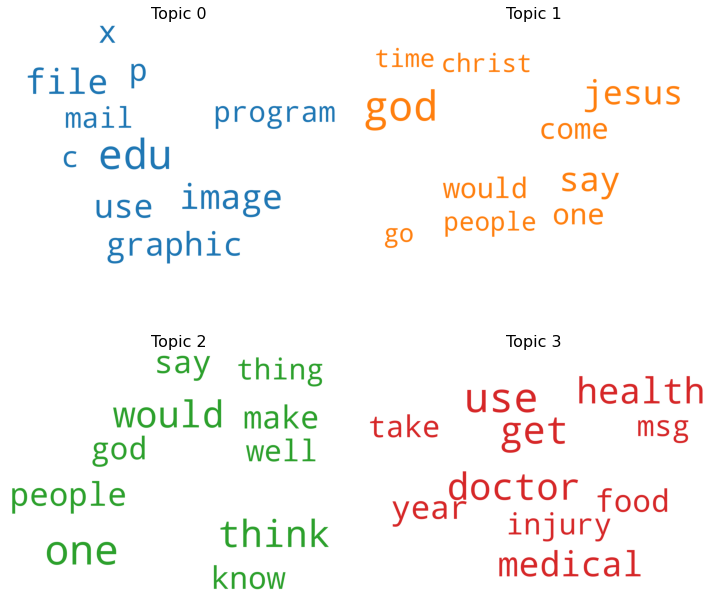

In [640]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=sw_nltk,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()    

## Part 3 -  Naive bayes

### 3.1 Prepering the text & target columns for classification

In [612]:
y = train_df['target']

0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: target, Length: 2257, dtype: object

In [613]:
y_test = test_df['target']

0       2
1       2
2       2
3       0
4       3
       ..
1497    2
1498    2
1499    2
1500    2
1501    1
Name: target, Length: 1502, dtype: object

**We can see that the type of the targets is 'object', we need it to be an 'int'.
Let's fix it:**

In [614]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


train_data = [' '.join(ele) for ele in train_df['text']]
test_data = [' '.join(ele) for ele in test_df['text']]


y = train_df['target'].astype(str).astype(int)
y_test = test_df['target'].astype(str).astype(int)

In [699]:
X = train_data

In [700]:
X_test = test_data

### 3.2 CountVectorizer

#### 3.2.2 Creating BoW by CountVectorizer

In [617]:
bag_of_words_creator = CountVectorizer()
bag_of_words = bag_of_words_creator.fit_transform(X)
bag_of_words

<2257x21119 sparse matrix of type '<class 'numpy.int64'>'
	with 152800 stored elements in Compressed Sparse Row format>

#### 3.2.3 transform testing data (using fitted vocabulary) into a document-term matrix

In [618]:
X_test_dtm = bag_of_words_creator.transform(X_test)
X_test_dtm

<1502x21119 sparse matrix of type '<class 'numpy.int64'>'
	with 107280 stored elements in Compressed Sparse Row format>

#### 3.2.4  Fitting, predictions & model accurecy

In [692]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha = 0.1)
nb.fit(bag_of_words, y)

MultinomialNB(alpha=0.1)

In [693]:
nb.n_features_in_

21119

In [694]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

##### Model accuracy:

In [695]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8435419440745673

### 3.3 Naive Bias with TF-IDF

#### 3.3.1 Creating  TfidfVectorizer

In [660]:
tfidf_creator = TfidfVectorizer(min_df = 0.2)
X_train_tfidf = tfidf_creator.fit_transform(X)
X_train_tfidf

<2257x12 sparse matrix of type '<class 'numpy.float64'>'
	with 6923 stored elements in Compressed Sparse Row format>

In [624]:
X_test_tfidf = tfidf_creator.transform(X_test)
X_test_tfidf

<1502x12 sparse matrix of type '<class 'numpy.float64'>'
	with 4699 stored elements in Compressed Sparse Row format>

#### 3.3.2 Fitting, predictions & model accurecy

In [656]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y)

MultinomialNB()

In [657]:
y_pred_class_TFIDF = nb.predict(X_test_tfidf)

##### Model accuracy:

In [658]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class_TFIDF)

0.362849533954727

 **The CountVectorizer is much more accurate.**

#### 3.3.3 Confusion matrix 

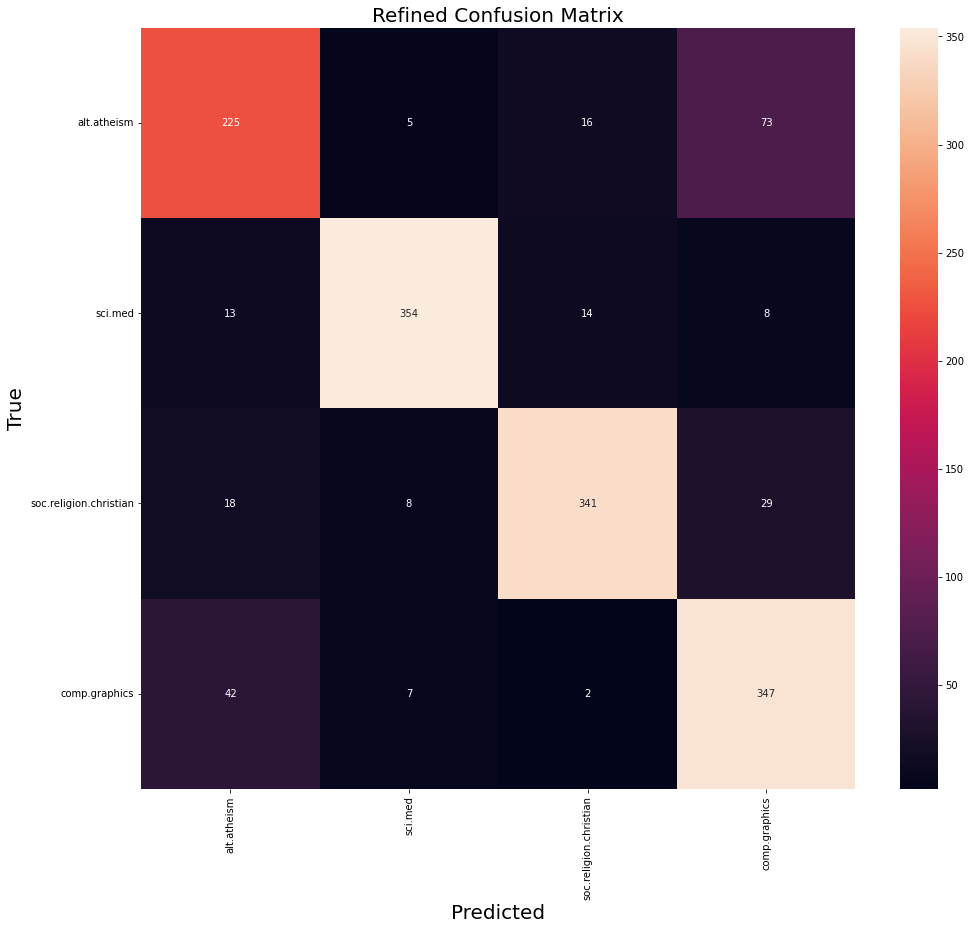

In [686]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_class)
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(cats, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(cats, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

## Part 4 - LDA with sklearn

### 4.1 LDA with countvectorizer BOW

In [629]:
lda_bag_of_words_creator = LatentDirichletAllocation(learning_method='batch', n_components=4)
lda_bag_of_words = lda_bag_of_words_creator.fit_transform(bag_of_words)

In [630]:
print("~~~ Topics found by bag of words LDA ~~~")
for topic_id, topic in enumerate(lda_bag_of_words_creator.components_):
    message = "Topic #{}: ".format(topic_id + 1)
    message += " ".join([bag_of_words_creator.get_feature_names_out()[i] for i in topic.argsort()[:-7 :-1]])
    print(message)

~~~ Topics found by bag of words LDA ~~~
Topic #1: god one say would people think
Topic #2: image edu use file graphic program
Topic #3: get one would time disease take
Topic #4: one think know would make msg


### 4.2 LDA with TF-IDF vectorizer

In [631]:
lda_tfidf_creator = LatentDirichletAllocation(learning_method='batch', n_components=4)
lda_tfidf = lda_tfidf_creator.fit_transform(X_train_tfidf)

In [633]:
print("\n\n~~~ Topics found by tf-idf LDA ~~~")
for topic_id, topic in enumerate(lda_tfidf_creator.components_):
    message = "Topic #{}: ".format(topic_id + 1)
    message += " ".join([tfidf_creator.get_feature_names_out()[i] for i in topic.argsort()[:-7 :-1]])
    print(message)



~~~ Topics found by tf-idf LDA ~~~
Topic #1: use like know well would say
Topic #2: think say one make would well
Topic #3: would people well time like one
Topic #4: know get one make time would


### Conclusion:

- 1) CountVectorizer gave as much more accurate result then TF-IDF.
- 2) The Topics are pretty clear from the most significnt words that we found using LDA with Gensim & CountVectorizer. 
   however, the TF-IDF didn't do a great job in this field. 